<img style="float: left" src="julia.png">
<br><br><br><br><br>
### Vega.jl: A Simple Visualization Library<br><br>
#### Collaborators Wanted
JuliaCon 2015: June 27, 2015<br>
Massachusetts Institute of Technology
***
Randy Zwitch <br>
[@randyzwitch](https://twitter.com/randyzwitch)<br>
http://randyzwitch.com <br>
https://github.com/randyzwitch/juliacon2015
<br>
<br>
<br>
<br>

#### Do we really NEED another plotting library?

#YES! There's always room for more graphing capabilities!

###Example: Stacked Bar Chart

In [1]:
using Vega

x = [0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9]
y = [28, 43, 81, 19, 52, 24, 87, 17, 68, 49, 55, 91, 53, 87, 48, 49, 66, 27, 16, 15]
g = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

#Minimalistic interface by design
b = barplot(x = x, y = y, group = g, stacked = true)

###But why not Gadfly?

###Declarative syntax vs. Grammar of Graphics

In [5]:
#Changing color scheme: Vega.jl
colorscheme!(b, ("Greens", 3))

###Stacked Bar Chart: Gadfly

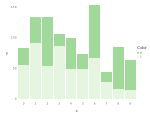

In [8]:
using Gadfly
set_default_plot_size(15cm, 12cm)

plot(x = x, y = y, color = g, Geom.bar,
Scale.x_discrete, 
Scale.y_continuous(minvalue=0, maxvalue=150),
Scale.color_discrete_manual("rgb(161,217,155)", "rgb(229,245,224)"),
Theme(bar_spacing = 1mm, grid_color=color("white"), 
grid_color_focused=color("white")))

###So, both libraries do the same thing?

###Yes, but...

###High cognitive cost to Grammar of Graphics

##Goals for Vega.jl:

* To create a minimal, declarative plotting syntax
* To provide granular control to Vega.js library, but keep hidden from everyday user
* To provide the most common types of graphics, as fast as possible

##Selected Examples

Documentation for Vega.jl: <br><br>
http://johnmyleswhite.github.io/Vega.jl/

In [9]:
#Area plot with custom color scheme
x = [0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9]
y = [28, 43, 81, 19, 52, 24, 87, 17, 68, 49, 55, 91, 53, 87, 48, 49, 66, 27, 16, 15]
g = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

a = areaplot(x = x, y = y, group = g, stacked = true)
colorscheme!(a, ("Reds", 3))

In [12]:
#Choropleth with stroke around counties
using DataFrames
df = readtable(Pkg.dir("Vega", "deps/vega/examples/data/unemployment.tsv"))

v = choropleth(x = df[:id], y = df[:rate])
stroke!(v)
colorscheme!(v, ("Purples", 9))

In [13]:
#Population chart
using JSON

df = DataFrame()
for p in JSON.parse(readall(Pkg.dir("Vega", "deps/vega/examples/data/population.json")))
    df = vcat(df, DataFrame(;[symbol(k)=>v for (k,v) in p]...))
end

pop1930 = df[df[:year] .== 1930, :];

x = pop1930[:people]
y = pop1930[:age]
group = pop1930[:sex]

popchart(x = x, y = y, group = group)

##Collaborators Wanted!

* Codebase is relatively simple
* There are multiple TODOs
* There is an online Vega Editor to replicate graphics (http://trifacta.github.io/vega/editor/)

To Do:

Functions/Types:
- Move all legend attributes into one function
- yticks! xticks! function
- Vega transform type (correctly)
- Vega format type (correctly)
- Keyword options for title!, xlab!/ylab!, legend!
- Add keyword arguments to visualizations for commonly used features
- error bars/shading around lines
- change icon type (circles, triangles, etc.)
- grouped bar horizontal in coord_flip!
- How to layer plots?
- Make all functions have keyword arguments, with only v::VegaVisualization the required argument

Visualizations:

- Force
- State choropleth
- Bullet Chart
- Boxplot / Horizontal Boxplot / Grouped Boxplot
- Add chord chart from d3.js
- Sankey from d3.js
- Calendar View Chart from d3.js
- Rug plot
- Weather
- parallel coordinates
- Treemap
- Error
- Jobs
- Scatterplot matrix (faceting)
- Barley (Faceting)
- Bubble Chart
- Lifelines
- Aster plot
- Diverging Stacked Bar Chart
- polar coordinate graph
- spiderweb graph / radial
- annotate heatmap
- joint density plot / hexbin
- correlation plot
- violin plot
- cluster map
- control charts

Value unclear:
- Switch to Nullable Types
- Sanitize inputs to be correct for visualization
- change add_data! to not add zeroes everywhere there are blanks
- Arc visualization
- overload Base.+ with pipe operator to mimic ggplot syntax
- Have global settings for size similar to Seaborn/Gadfly themes

##End of Presentation